In [52]:
import pandas as pd
import os
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({
                "pgf.texsystem": "pdflatex",
                'font.family': 'serif',
                'text.usetex': True,
                'pgf.rcfonts': False,
            })

In [72]:
exp_type = 'simulation'
exp = '10C'
exp_name = '2024_03_22-16_00_41'

**Prepare structures and functions to plot everything we need**

In [73]:
folder_exp_dict = {'pv': 'PV_profile', '20C': '20C_check_up', '10C': '30C_check_up', 'pv2': 'PV_profile2',}

In [74]:
folder = "../data/output/" + exp_type + '/'
folder_path = Path(folder)

ground_file = folder_path / folder_exp_dict[exp] / exp_name / 'ground.csv'
output_file = folder_path / folder_exp_dict[exp] / exp_name / 'dataset.csv'

In [75]:
def plot_separated_vars(df, 
                        variables: list, 
                        x_var: str, 
                        x_label: list, 
                        y_labels : list, 
                        legend_labels: list, 
                        markers: list,
                        title: str, 
                        colors=None, 
                        save_figs=False, 
                        fig_name='',
                        fig_format='svg'
                       ):
    if not colors:
        colors = ['cyan', 'violet', 'purple', 'magenta']
    
    fig, axes = plt.subplots(len(variables), 1, figsize=(15, 4 * len(variables)), sharex=True)
    
    # Plot iteratively all the variables
    for i, var in enumerate(variables):
        
        # We need this assignement in the case of a single variable
        if len(variables) == 1:
            ax = axes
        else:
            ax = axes[i]
        
        # Command for the grid
        ax.grid(visible=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
        ax.minorticks_on()
        ax.grid(visible=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)
        
        ax.plot(df[x_var], df[var], label=legend_labels[i], color=colors[i], marker=markers[i], markevery=5000)
        #ax.scatter(df[x_var], df[var], label=legend_labels[i], color=colors[i],)

        
        ax.ticklabel_format(style='plain')
        ax.tick_params(labelsize=16)
        ax.set_xlabel(x_label, size=18)
        ax.set_ylabel(y_labels[i], size=18)
        
        ax.legend(fontsize=14)
    
    fig.suptitle(title, fontsize=20)
    
    plt.show()
    
    if save_figs:
        if fig_format == 'pgf':
            matplotlib.rcParams.update({
                "pgf.texsystem": "pdflatex",
                'font.family': 'serif',
                'text.usetex': True,
                'pgf.rcfonts': False,
            })
            
        fig.savefig("{}.{}".format(fig_name, fig_format), format=fig_format)
        

### PLOT SEPARATED DATA

In [76]:
df_ground = pd.read_csv(ground_file)
#df_ground['current'] = df_ground['current'].values * (-1)
df_ground

,current,voltage,temperature,power,time
0,3.6374,4.1476,307.6424,15.086472,0.0
1,4.0103,4.1497,307.6368,16.641697,1.0
2,3.8333,4.1499,307.6111,15.907923,2.0
3,3.7303,4.1499,307.6440,15.480574,3.0
4,3.6009,4.1500,307.6828,14.943956,4.0
...,...,...,...,...,...
32464,0.2926,4.1499,308.1402,1.214201,32464.0
32465,0.2543,4.1500,308.1857,1.055203,32465.0
32466,0.2601,4.1499,308.1279,1.079503,32466.0
32467,0.2833,4.1499,308.1698,1.175830,32467.0


In [77]:
df = pd.read_csv(output_file)
df['current'] = df['current'].values * (-1)
df

,time,soc,soh,voltage,current,power,Vocv,R0,R1,C,temperature,heat
0,-1.0,1.0,1.0,4.150000,-0.0000,0.000000,0.000000,0.002027,0.001837,11151.585719,307.650000,0.000000
1,0.0,1.0,1.0,4.146090,3.6374,15.080989,4.138407,0.002027,0.001837,11151.585719,307.650284,0.026870
2,1.0,1.0,1.0,4.147174,4.0103,16.631414,4.138407,0.002027,0.001837,11151.614491,307.650604,0.032820
3,2.0,1.0,1.0,4.147113,3.8333,15.897130,4.138407,0.002027,0.001837,11151.646970,307.650906,0.030261
4,3.0,1.0,1.0,4.147180,3.7303,15.470225,4.138406,0.002027,0.001837,11151.677700,307.651200,0.029004
...,...,...,...,...,...,...,...,...,...,...,...,...
32465,32464.0,1.0,1.0,4.139437,0.2926,1.211199,4.138335,0.002016,0.001825,11177.481754,307.904920,0.000316
32466,32465.0,1.0,1.0,4.139358,0.2543,1.052639,4.138335,0.002016,0.001825,11177.453077,307.904636,0.000273
32467,32466.0,1.0,1.0,4.139368,0.2601,1.076650,4.138335,0.002016,0.001825,11177.424190,307.904352,0.000278
32468,32467.0,1.0,1.0,4.139415,0.2833,1.172696,4.138335,0.002016,0.001825,11177.395374,307.904069,0.000304


In [78]:
args_20c = {
    'df': df, 
    'variables': ['current'], 
    'x_var': 'time', 
    'x_label': 'Time [s]',
    'y_labels': ['[A]'],
    'legend_labels': ['Current'],
    #'markers': ['o', 's', 'D'],
    'markers': [None, None, None],    
    'title': '20°C profile',
    'colors': ['purple'],
    'save_figs': False,
    'fig_name': '20C_load',
    'fig_format': 'svg'
}

In [79]:
args_pv = {
    'df': df_ground,
    'variables': ['current'], 
    'x_var': 'time', 
    'x_label': 'Time [s]',
    'y_labels': ['[A]'],
    'legend_labels': ['Current'],
    #'markers': ['o', 's', 'D'],
    'markers': [None, None, None],
    'line_style': ['dashed'],
    'title': 'PV profile',
    'colors': ['purple', 'violet', 'blue'],
    'save_figs': False,
    'fig_name': 'pv_load',
    'fig_format': 'svg'
}

args_pv2 = {
    'df': df_ground,
    'variables': ['current'], 
    'x_var': 'time', 
    'x_label': 'Time [s]',
    'y_labels': ['[A]'],
    'legend_labels': ['Current'],
    #'markers': ['o', 's', 'D'],
    'markers': [None, None, None],
    'title': 'PV profile',
    'colors': ['purple', 'violet', 'blue'],
    'save_figs': True,
    'fig_name': 'pv2_load',
    'fig_format': 'svg'
}

In [80]:
args_10c = {
    'df': df_ground, 
    'variables': ['current'], 
    'x_var': 'time', 
    'x_label': 'Time [s]',
    'y_labels': ['[A]'],
    'legend_labels': ['Current'],
    #'markers': ['o', 's', 'D'],
    'markers': [None, None, None],    
    'title': 'Check-up Profile',
    'colors': ['purple'],
    'save_figs': True,
    'fig_name': 'checkup_load',
    'fig_format': 'svg'
}

In [81]:
args = {'pv': args_pv, 'pv2': args_pv2, '20C': args_20c, '10C': args_10c}

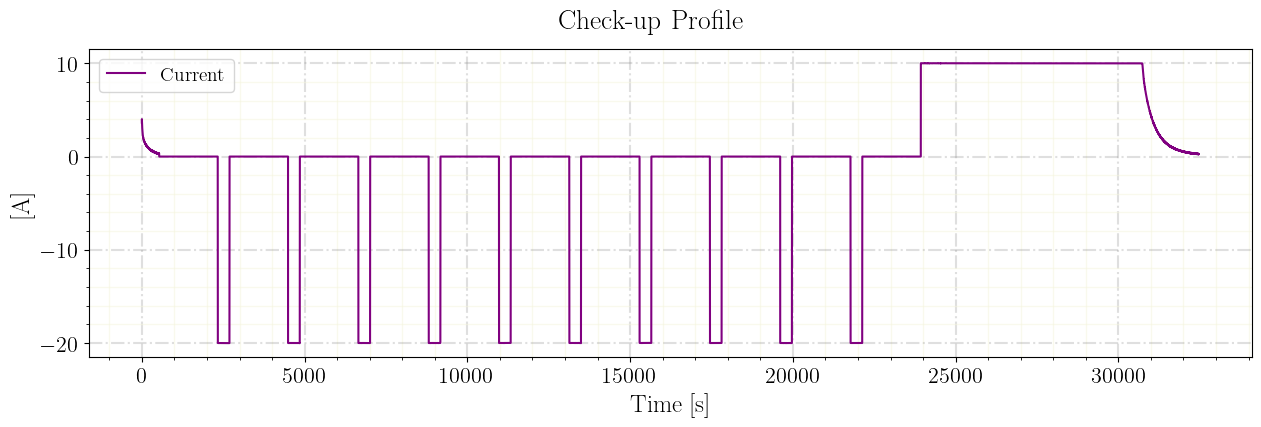

In [82]:
plot_separated_vars(**args[exp])

In [51]:
plot_separated_vars(**args_pv_ground)

NameError: name 'args_pv_ground' is not defined